In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df=pd.read_csv('psx.csv')
df.head()

,_id,Date,Open,High,Low,Close,Change,Volume
0,1,2021-02-23T00:00:00,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,2,2021-02-22T00:00:00,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,3,2021-02-19T00:00:00,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,4,2021-02-18T00:00:00,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,5,2021-02-17T00:00:00,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [4]:
df.info

<bound method DataFrame.info of        _id                 Date       Open       High        Low      Close  \
0        1  2021-02-23T00:00:00  31,722.16  31,800.90  31,597.31  31,626.19   
1        2  2021-02-22T00:00:00  31,874.78  31,958.58  31,612.55  31,647.57   
2        3  2021-02-19T00:00:00  31,748.75  31,904.30  31,749.43  31,851.18   
3        4  2021-02-18T00:00:00  32,049.85  32,104.67  31,745.72  31,759.82   
4        5  2021-02-17T00:00:00  32,166.21  32,390.77  32,044.01  32,048.68   
...    ...                  ...        ...        ...        ...        ...   
3216  3217  2008-02-28T00:00:00  10,688.98  10,724.21  10,655.23  10,704.15   
3217  3218  2008-02-27T00:00:00  10,670.68  10,732.92  10,623.36  10,664.36   
3218  3219  2008-02-26T00:00:00  10,596.40  10,668.35  10,578.01  10,668.35   
3219  3220  2008-02-25T00:00:00  10,625.66  10,709.06  10,579.49  10,588.84   
3220  3221  2008-02-22T00:00:00  10,634.22  10,635.42  10,546.38  10,607.29   

       Change      

In [5]:
df.isnull().sum()

_id       0
Date      0
Open      0
High      0
Low       0
Close     0
Change    0
Volume    0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.sort_values('Date',inplace=True)
df

,_id,Date,Open,High,Low,Close,Change,Volume
3220,3221,2008-02-22,"10,634.22","10,635.42","10,546.38","10,607.29",0,"313,082,688"
3219,3220,2008-02-25,"10,625.66","10,709.06","10,579.49","10,588.84",-18.45,"273,149,184"
3218,3219,2008-02-26,"10,596.40","10,668.35","10,578.01","10,668.35",79.51,"265,668,784"
3217,3218,2008-02-27,"10,670.68","10,732.92","10,623.36","10,664.36",-3.99,"396,419,776"
3216,3217,2008-02-28,"10,688.98","10,724.21","10,655.23","10,704.15",39.79,"325,539,584"
...,...,...,...,...,...,...,...,...
4,5,2021-02-17,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"
3,4,2021-02-18,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
2,3,2021-02-19,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
1,2,2021-02-22,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Remove commas and convert numerical columns to float
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = df[col].str.replace(',', '').astype(float)

# Apply MinMaxScaler to numerical columns
scaler = MinMaxScaler()
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display summary statistics
print('\nSummary statistics:')
print(df.describe())



Summary statistics:
               _id                           Date         Open         High  \
count  3221.000000                           3221  3221.000000  3221.000000   
mean   1611.000000  2014-08-25 10:01:18.236572416     0.464207     0.464715   
min       1.000000            2008-02-22 00:00:00     0.000000     0.000000   
25%     806.000000            2011-05-24 00:00:00     0.146362     0.145114   
50%    1611.000000            2014-08-27 00:00:00     0.555108     0.555730   
75%    2416.000000            2017-11-23 00:00:00     0.742777     0.746334   
max    3221.000000            2021-02-23 00:00:00     1.000000     1.000000   
std     929.966935                            NaN     0.292404     0.294050   

               Low        Close       Volume  
count  3221.000000  3221.000000  3221.000000  
mean      0.463595     0.465048     0.276503  
min       0.000000     0.000000     0.000000  
25%       0.145359     0.146661     0.207172  
50%       0.554200     0.556187 

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import joblib

C:\Users\CAPTAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - loss: 0.0191 - val_loss: 0.0010
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0018 - val_loss: 8.6874e-04
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 0.0017 - val_loss: 7.1838e-04
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0013 - val_loss: 7.8788e-04
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.0012 - val_loss: 6.6042e-04
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 9.6856e-04 - val_loss: 6.3004e-04
Epoch 12/50
79/79 ━━━━━━━

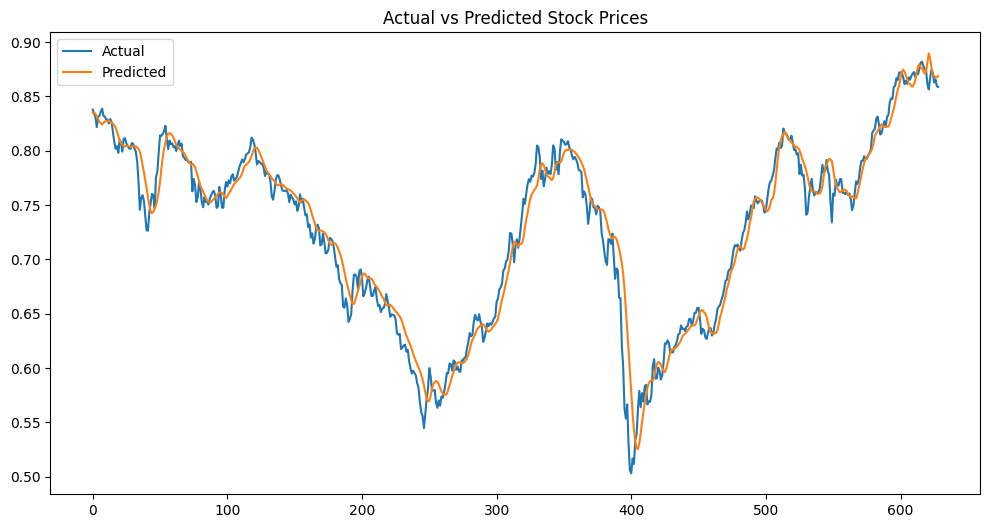

['scaler.pkl']

In [16]:
# 3. Feature Engineering
# Calculate Moving Averages
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Add Lag Features
df['Prev_Close'] = df['Close'].shift(1)

# Drop rows with NaN values after feature engineering
df.dropna(inplace=True)

# 4. Normalize/Scale Features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Close', 'Volume', 'MA_10', 'MA_20', 'Prev_Close']])
scaled_df = pd.DataFrame(scaled_features, columns=['Close', 'Volume', 'MA_10', 'MA_20', 'Prev_Close'])

# --- Prepare Training and Testing Data ---
# Create sequences for LSTM
def create_sequences(data, target_col, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length, target_col]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 60  # Use 60 days of data to predict the next day's price
X, y = create_sequences(scaled_features, target_col=0, seq_length=SEQ_LENGTH)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- Build LSTM Model ---
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate the Model ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# --- Visualize Predictions ---
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

# --- Save the Model ---
model.save("stock_price_model.h5")
joblib.dump(scaler, "scaler.pkl")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step 
RMSE: 0.017721698845302707
MAE: 0.012291406453335587


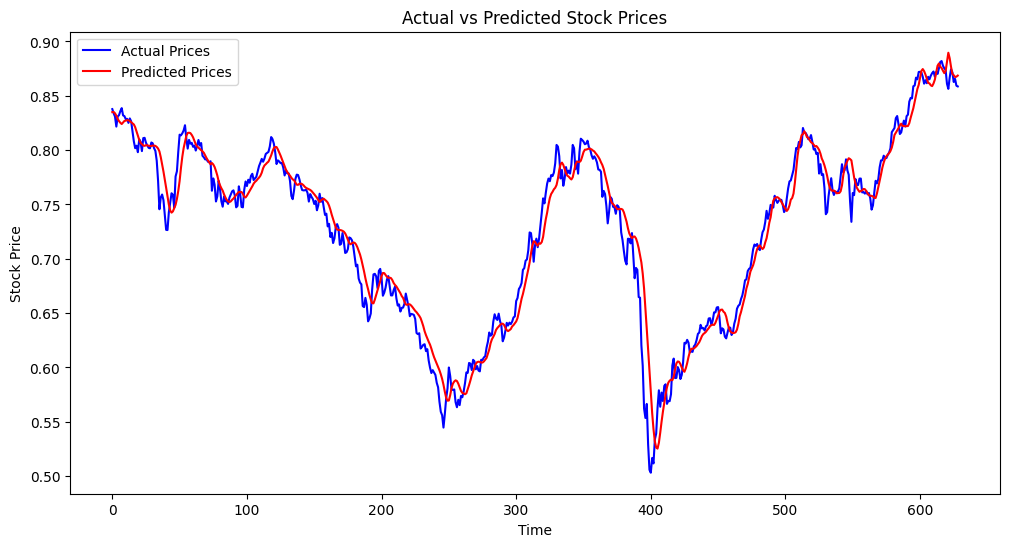

['scaler.pkl']

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import joblib
# --- Evaluation Code ---
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Predict stock prices for the test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# --- Visualize Predictions ---
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# --- Save the Model ---
# Save the trained LSTM model
model.save("stock_price_model.h5")

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")


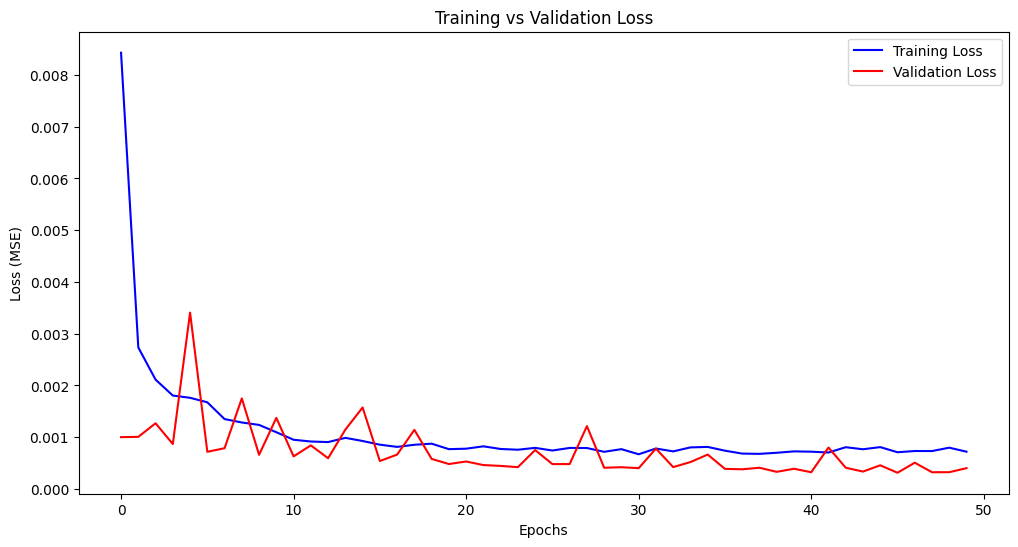

In [18]:
# --- Get the training and validation loss ---
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# --- Plot training and validation loss ---
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


In [19]:
# Final loss (MSE) from the training process
final_loss = history.history['loss'][-1]
print(f"Final Training Loss (MSE): {final_loss}")

# Final validation loss (MSE)
final_val_loss = history.history['val_loss'][-1]
print(f"Final Validation Loss (MSE): {final_val_loss}")

Final Training Loss (MSE): 0.0007203724817372859
Final Validation Loss (MSE): 0.0004022780049126595
